In [1]:
import numpy as np 
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('Admission.xlsx')
df.head()

,SlNo,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
0,1,M,62.00,Others,88.00,Others,Commerce,52.00,Science,0,MAT,55.0,58.80,Marketing & HR,50,65,74,Placed,270000
1,2,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,1,MAT,86.5,66.28,Marketing & Finance,69,70,75,Placed,200000
2,3,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,0,NaN,0.0,52.91,Marketing & Finance,50,61,59,Placed,240000
3,4,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,0,MAT,75.0,57.80,Marketing & Finance,54,66,62,Placed,250000
4,5,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,1,MAT,66.0,59.43,Marketing & HR,52,65,67,Placed,180000


In [3]:
df.isnull().sum()

SlNo                    0
Gender                  0
Percent_SSC             0
Board_SSC               0
Percent_HSC             0
Board_HSC               0
Stream_HSC              0
Percent_Degree          0
Course_Degree           0
Experience_Yrs          0
Entrance_Test          67
Percentile_ET           0
Percent_MBA             0
Specialization_MBA      0
Marks_Communication     0
Marks_Projectwork       0
Marks_BOCA              0
Placement               0
Salary                  0
dtype: int64

In [4]:
df.Entrance_Test.value_counts()

MAT      265
K-MAT     24
CAT       22
PGCET      8
GCET       2
G-MAT      1
XAT        1
G-SAT      1
Name: Entrance_Test, dtype: int64

In [5]:
df['Entrance_Test']=df['Entrance_Test'].replace({'K-MAT':'OTHERS','PGCET':'OTHERS','GCET':'OTHERS','XAT':'OTHERS',
                                                'G-SAT':'OTHERS','G-MAT':'OTHERS'})

In [6]:
df.Entrance_Test.value_counts()

MAT       265
OTHERS     37
CAT        22
Name: Entrance_Test, dtype: int64

In [7]:
df['Entrance_Test'].isnull().sum()

67

In [8]:
df['Entrance_Test']=df.Entrance_Test.fillna("NO_EXAM")


In [9]:
df.Entrance_Test.value_counts()

MAT        265
NO_EXAM     67
OTHERS      37
CAT         22
Name: Entrance_Test, dtype: int64

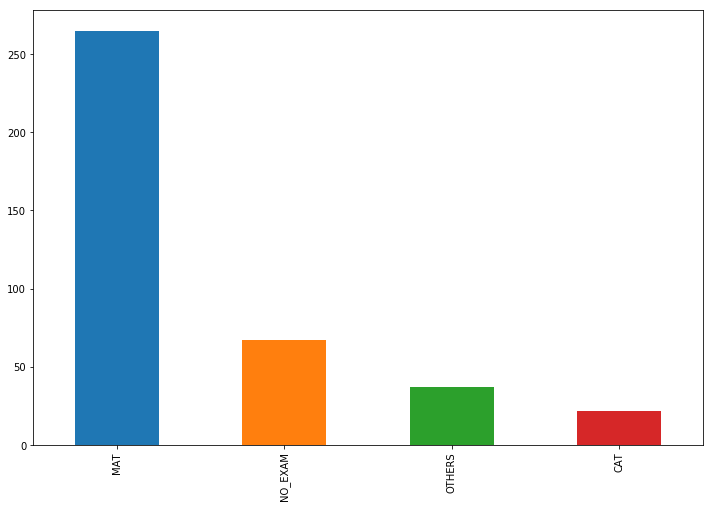

In [10]:
plt.figure(figsize=(12,8))
df.Entrance_Test.value_counts().plot(kind='bar')

In [11]:
df.isnull().sum()

SlNo                   0
Gender                 0
Percent_SSC            0
Board_SSC              0
Percent_HSC            0
Board_HSC              0
Stream_HSC             0
Percent_Degree         0
Course_Degree          0
Experience_Yrs         0
Entrance_Test          0
Percentile_ET          0
Percent_MBA            0
Specialization_MBA     0
Marks_Communication    0
Marks_Projectwork      0
Marks_BOCA             0
Placement              0
Salary                 0
dtype: int64

In [12]:
df= df.drop('SlNo', axis=1)

In [13]:
df.columns

Index(['Gender', 'Percent_SSC', 'Board_SSC', 'Percent_HSC', 'Board_HSC',
       'Stream_HSC', 'Percent_Degree', 'Course_Degree', 'Experience_Yrs',
       'Entrance_Test', 'Percentile_ET', 'Percent_MBA', 'Specialization_MBA',
       'Marks_Communication', 'Marks_Projectwork', 'Marks_BOCA', 'Placement',
       'Salary'],
      dtype='object')

In [14]:
df.Placement.value_counts()

Placed        312
Not Placed     79
Name: Placement, dtype: int64

Text(0.5, 0, 'Placement')

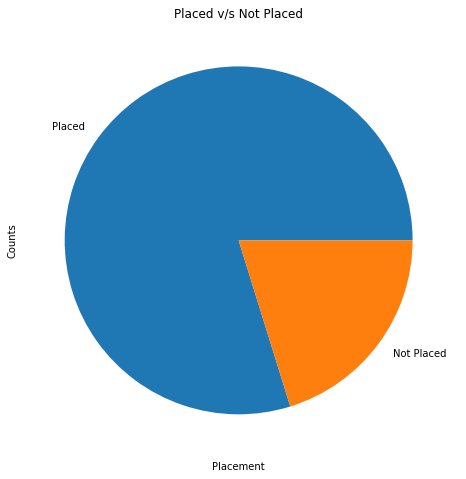

In [15]:
plt.figure(figsize=(12,8))
df.Placement.value_counts().plot(kind='pie')
plt.title('Placed v/s Not Placed')
plt.ylabel('Counts')
plt.xlabel('Placement')

In [16]:
df.Salary.describe()

count       391.000000
mean     219078.260870
std      138311.647036
min           0.000000
25%      172800.000000
50%      240000.000000
75%      300000.000000
max      940000.000000
Name: Salary, dtype: float64

In [17]:
df[df['Salary']<=240000].shape

(197, 18)

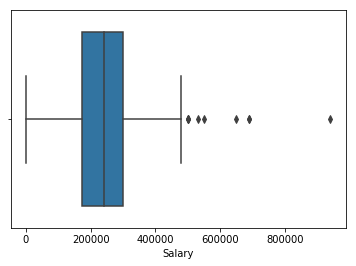

In [18]:
sns.boxplot(df['Salary'])

C:\Users\VISHAL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


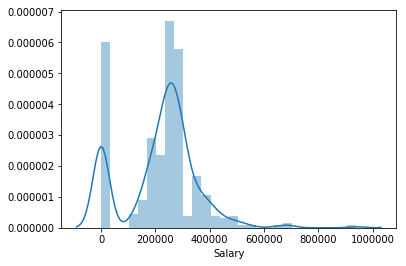

In [19]:
sns.distplot(df['Salary'])

In [20]:
from scipy.stats.mstats import winsorize

In [21]:
df['Salary']=winsorize(df['Salary'], limits=[0.025,0.025])

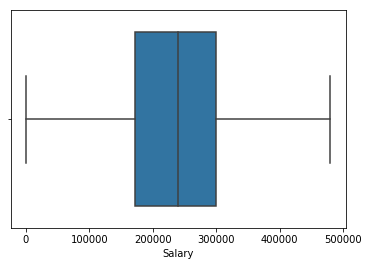

In [22]:
sns.boxplot(df['Salary'])

In [23]:
df[df['Salary']>480000].shape

(0, 18)

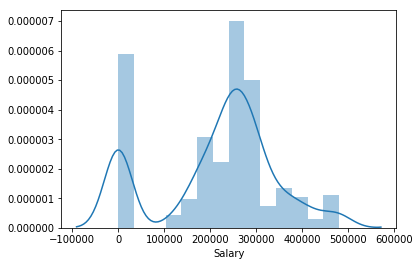

In [24]:
sns.distplot(df['Salary'])

# B

In [25]:
def New_Salary(x):
    if (x<=240000):
        return 0
    elif (x>240000):
        return 1

In [26]:
df['New_Salary'] =  df["Salary"].apply(New_Salary)

In [27]:
df['New_Salary'].value_counts()

0    197
1    194
Name: New_Salary, dtype: int64

In [28]:
df= df.drop('Salary', axis=1)

In [29]:
df.head()

,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,New_Salary
0,M,62.00,Others,88.00,Others,Commerce,52.00,Science,0,MAT,55.0,58.80,Marketing & HR,50,65,74,Placed,1
1,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,1,MAT,86.5,66.28,Marketing & Finance,69,70,75,Placed,0
2,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,0,NO_EXAM,0.0,52.91,Marketing & Finance,50,61,59,Placed,0
3,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,0,MAT,75.0,57.80,Marketing & Finance,54,66,62,Placed,1
4,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,1,MAT,66.0,59.43,Marketing & HR,52,65,67,Placed,0


In [30]:
X=df.drop('New_Salary', axis=1)
y=df['New_Salary']

In [31]:
X=pd.get_dummies(X)

In [32]:
X.shape

(391, 36)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=65,test_size=0.2)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

C:\Users\VISHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
print(accuracy_score(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))
fpr,tpr,_ =metrics.roc_curve(y_test, y_predict)
print(metrics.auc(fpr,tpr))

0.7468354430379747
              precision    recall  f1-score   support

           0       0.87      0.62      0.72        42
           1       0.67      0.89      0.77        37

    accuracy                           0.75        79
   macro avg       0.77      0.76      0.74        79
weighted avg       0.78      0.75      0.74        79

0.7554697554697555


In [36]:
print(accuracy_score(y_test, y_predict))
print(metrics.cohen_kappa_score(y_test,y_predict))
print(metrics.f1_score(y_test, y_predict))

0.7468354430379747
0.5012626262626263
0.7674418604651163


In [37]:
from sklearn.model_selection import KFold

In [38]:
kfold=KFold(n_splits=5,shuffle=True,random_state=2)
aucmetric=[]
acc=[]
f1=[]
kappa=[]
for train,test in kfold.split(X,y):
    X_train,X_test = X.iloc[train,:], X.iloc[test,:]
    y_train,y_test = y[train],y[test]
    lr=LogisticRegression()
    ypred=lr.fit(X_train,y_train).predict(X_test)
    acc.append(metrics.accuracy_score(y_test,ypred))
    f1.append(metrics.f1_score(y_test,ypred))
    kappa.append(metrics.cohen_kappa_score(y_test,ypred))
    fpr,tpr,_=metrics.roc_curve(y_test,ypred)
    aucmetric.append(metrics.auc(fpr,tpr))
print('Avg Accuracy of KFold LR Model is {}'.format(round(np.mean(acc),3)))
print('Avg F1-score of KFold LR Model is {}'.format(round(np.mean(f1),3)))
print('Avg Cohens Kappa Score of KFold LR Model is {}'.format(round(np.mean(kappa),3)))
print('Avg AUC of KFold LR Model is {}'.format(round(np.mean(aucmetric),3)))


Avg Accuracy of KFold LR Model is 0.716
Avg F1-score of KFold LR Model is 0.734
Avg Cohens Kappa Score of KFold LR Model is 0.431
Avg AUC of KFold LR Model is 0.716


C:\Users\VISHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VISHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VISHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VISHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VISHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile